##**1.Load the data**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/MaunaLoaDailyTemps.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.info())

       DATE  MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
0  1/1/2014     33.0     46.0     40.0      657    1756
1  1/2/2014     35.0     50.0     43.0      657    1756
2  1/3/2014     36.0     45.0     41.0      657    1757
3  1/4/2014     32.0     41.0     37.0      658    1757
4  1/5/2014     24.0     38.0     31.0      658    1758
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB
None


##**2.Clean the data**

In [ ]:
#check missing values
data.isnull().sum()

,0
DATE,0
MinTemp,4
MaxTemp,4
AvgTemp,4
Sunrise,0
Sunset,0


In [ ]:
#impute for missing values in average temperature
data['AvgTemp'].fillna(data['AvgTemp'].mean(), inplace=True)

<ipython-input-15-ea38292b8642>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AvgTemp'].fillna(data['AvgTemp'].mean(), inplace=True)


In [ ]:
data.dtypes

,0
DATE,object
MinTemp,float64
MaxTemp,float64
AvgTemp,float64
Sunrise,int64
Sunset,int64


In [ ]:
# Convert the date column to a datetime format (if applicable)
data['DATE'] = pd.to_datetime(data['DATE'])

In [ ]:
data.shape

(1825, 6)

In [ ]:
# Set the date column as the index
data.set_index('DATE', inplace=True)

data.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [ ]:
data.shape

(1825, 5)

##**3.Visualize the data**

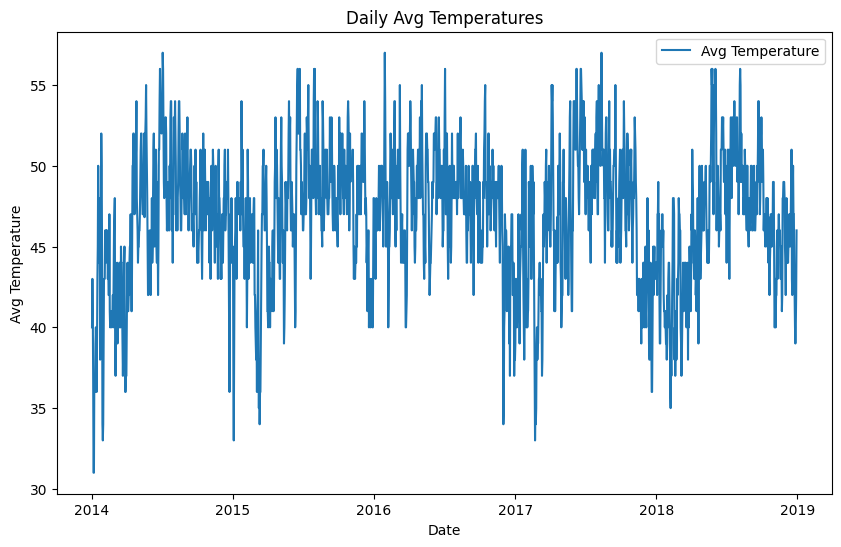

In [ ]:
# Plot the data to visualize trends and patterns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['AvgTemp'], label='Avg Temperature')
plt.title("Daily Avg Temperatures")
plt.xlabel("Date")
plt.ylabel("Avg Temperature")
plt.legend()
plt.show()

##**4.Check for Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(data['AvgTemp'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Interpret the result
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")


ADF Statistic: -6.594563113389793
p-value: 6.977825912591916e-09
The time series is stationary.


If the series is non-stationary, apply differencing to make it stationary:

In [ ]:
data['Temp_diff'] = data['AvgTemp'].diff().dropna()

# Re-run the ADF test on the differenced data
result = adfuller(data['Temp_diff'].dropna())
print("Differenced ADF Statistic:", result[0])
print("Differenced p-value:", result[1])


Differenced ADF Statistic: -13.675501514391293
Differenced p-value: 1.4328709335596839e-25


##**5.Auto ARIMA Function to Select the Model Order**

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.8 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto ARIMA model
auto_arima_model = auto_arima(data['AvgTemp'], trace=True,
                              error_action='ignore', suppress_warnings=True)

# Display the selected model order
print("Optimal ARIMA order:", auto_arima_model.order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8367.004, Time=9.83 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10366.472, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8392.171, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9157.155, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19234.261, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8383.250, Time=5.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8383.888, Time=4.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8374.760, Time=4.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8346.251, Time=7.50 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8359.387, Time=3.86 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8346.218, Time=5.38 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8358.095, Time=8.43 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8346.772, Time=7.15 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8334.924, Time=8.06 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

##**6.Train and Test split**

In [ ]:
# Split into training and test sets (last 30 days as test data)
train = data['AvgTemp'][:-30]
test = data['AvgTemp'][-30:]
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1795,)
Test shape: (30,)


##**7.Train the model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMA model with the order suggested by Auto ARIMA
model = ARIMA(train, order=auto_arima_model.order)
fitted_model = model.fit()

# Print the summary
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                AvgTemp   No. Observations:                 1795
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4083.793
Date:                Sat, 25 Jan 2025   AIC                           8183.586
Time:                        19:22:11   BIC                           8227.528
Sample:                    01-01-2014   HQIC                          8199.809
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5821      0.761     61.187      0.000      45.090      48.074
ar.L1          0.9859      0.005    190.359      0.000       0.976       0.996
ma.L1         -0.1462      0.023     -6.353      0.0

##**8.Make Predictions**

In [ ]:
# Predictions on the test set
predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1,type='levels')
print(predictions)

2018-12-01    44.768046
2018-12-02    44.994982
2018-12-03    45.370067
2018-12-04    45.708997
2018-12-05    45.857463
2018-12-06    45.867712
2018-12-07    45.877817
2018-12-08    45.887778
2018-12-09    45.897598
2018-12-10    45.907280
2018-12-11    45.916825
2018-12-12    45.926234
2018-12-13    45.935511
2018-12-14    45.944656
2018-12-15    45.953672
2018-12-16    45.962561
2018-12-17    45.971323
2018-12-18    45.979962
2018-12-19    45.988479
2018-12-20    45.996875
2018-12-21    46.005152
2018-12-22    46.013313
2018-12-23    46.021358
2018-12-24    46.029289
2018-12-25    46.037108
2018-12-26    46.044816
2018-12-27    46.052416
2018-12-28    46.059907
2018-12-29    46.067293
2018-12-30    46.074575
Freq: D, Name: predicted_mean, dtype: float64


<Axes: xlabel='DATE'>

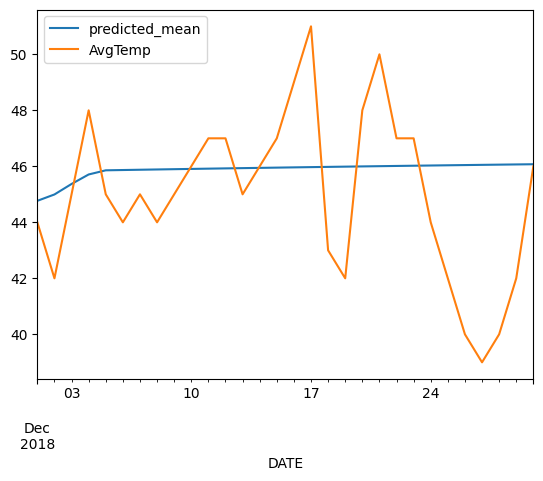

In [ ]:
predictions.plot(legend=True)
test.plot(legend=True)

##**9.Evaluate the model**

In [ ]:
test.mean()

45.0

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(predictions,test))
print(rmse)

2.998804179690803


##**10.Predict future values**
Retraining the entire dataset

In [ ]:
model2=ARIMA(data['AvgTemp'],order=(1,0,5))
model2=model2.fit()
data.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [ ]:
#index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(data),end=len(data)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
#pred.index=index_future_dates
print(pred)

2018-12-31    46.412666
2019-01-01    46.113965
2019-01-02    45.640397
2019-01-03    45.262949
2019-01-04    45.122442
2019-01-05    45.141739
2019-01-06    45.160771
2019-01-07    45.179541
2019-01-08    45.198053
2019-01-09    45.216310
2019-01-10    45.234316
2019-01-11    45.252074
2019-01-12    45.269588
2019-01-13    45.286860
2019-01-14    45.303896
2019-01-15    45.320697
2019-01-16    45.337266
2019-01-17    45.353608
2019-01-18    45.369725
2019-01-19    45.385620
2019-01-20    45.401297
2019-01-21    45.416758
2019-01-22    45.432006
2019-01-23    45.447045
2019-01-24    45.461876
2019-01-25    45.476504
2019-01-26    45.490930
2019-01-27    45.505158
2019-01-28    45.519190
2019-01-29    45.533029
2019-01-30    45.546677
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='DATE'>

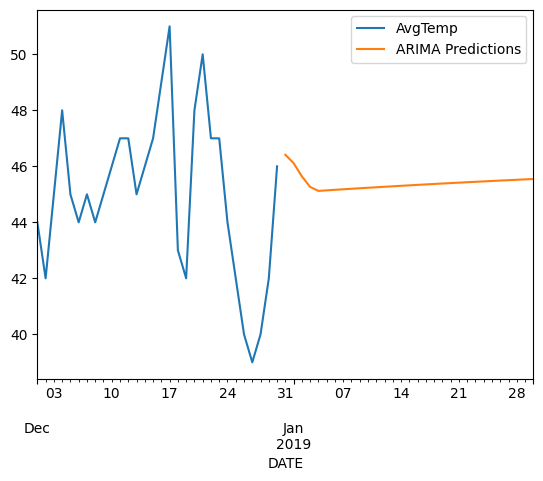

In [ ]:
#plot actual values of last 30 days and forecast values of next 30 days
data['AvgTemp'][-30:].plot(legend=True)
pred.plot(legend=True)
